<a href="https://colab.research.google.com/github/ashissahu/CONCEPTS/blob/master/Q_Q_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a Q-Q plot?
Quantile-Quantile plot or Q-Q plot is a scatter plot created by plotting 2 different quantiles against each other. The first quantile is that of the variable you are testing the hypothesis for and the second one is the actual distribution you are testing it against. For example, if you are testing if the distribution of age of employees in your team is normally distributed, you are comparing the quantiles of your team members’ age vs quantile from a normally distributed curve. If two quantiles are sampled from the same distribution, they should roughly fall in a straight line.
Since this is a visual tool for comparison, results can also be quite subjective nonetheless useful in the understanding underlying distribution of a variable(s)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

np.random.seed(100) #for reproducibility

## Checking for normality of data
Normal Data

In [2]:
# Generate 200 random normal data points with mean=0, standard_deviation=0.1
# Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
random_normal_datapoints = pd.Series(np.random.normal(0, 0.1, 200))

Text(0, 0.5, 'Frequency')

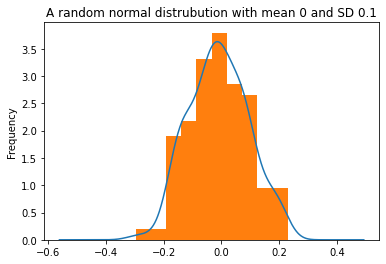

In [3]:
# Lets plot the data points along with its KDE to see how it looks
fig, ax = plt.subplots()
random_normal_datapoints.plot.kde(ax=ax, legend=False, title='A random normal distrubution with mean 0 and SD 0.1')
random_normal_datapoints.plot.hist(density=True, ax=ax)
ax.set_ylabel('Frequency')

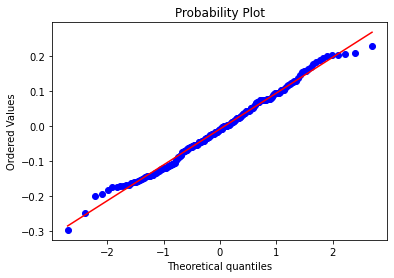

In [4]:
# Plot the Q-Q plot to graphically check for the hypothesis
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
res = stats.probplot(random_normal_datapoints, plot=plt)
plt.show()

## What happens when i check for normality on uniform data

In [5]:

# generating 200 uniformly distributed datapoints between the range of -1 and 0
# Documentation : https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
random_uniform_datapoints = pd.Series(np.random.uniform(-1,1,200))

(-1.0, 1.0)

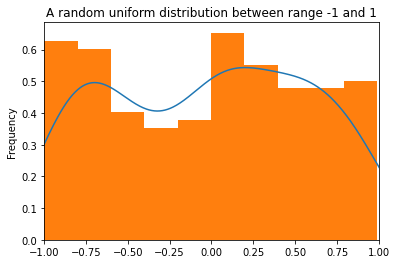

In [6]:
# Lets plot the data points along with its KDE to see how it looks
fig, ax = plt.subplots()
random_uniform_datapoints.plot.kde(ax=ax, legend=False, title='A random uniform distribution between range -1 and 1')
random_uniform_datapoints.plot.hist(density=True, ax=ax)
ax.set_ylabel('Frequency')
plt.xlim((-1,1))

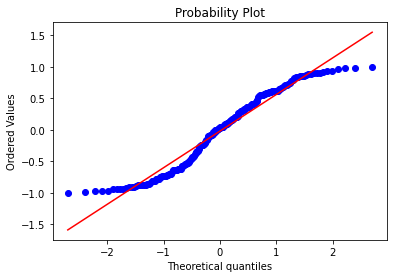

In [7]:
# Plot the Q-Q plot to graphically check for the hypothesis
res = stats.probplot(random_uniform_datapoints, plot=plt)
plt.show()

## Check for other distributions

In [8]:
# Lets consider an example where i have an intuition that my data is exponentially distributed. I want to check if
# it is the case via Q-Q plot

## Generating 200 data points with Scale 1.0 exponential
## Documentation : https://numpy.org/doc/1.16/reference/generated/numpy.random.exponential.html#numpy.random.exponential
random_exponential_data = pd.Series(np.random.exponential(scale=1.0, size=200))

(0.0, 6.0)

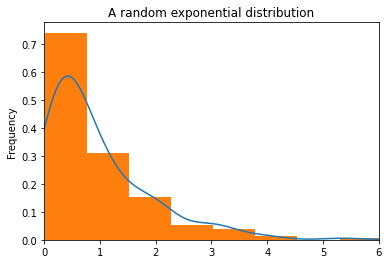

In [9]:
# Lets plot the data points along with its KDE to see how it looks
fig, ax = plt.subplots()
random_exponential_data.plot.kde(ax=ax, legend=False, title='A random exponential distribution')
random_exponential_data.plot.hist(density=True, ax=ax)
ax.set_ylabel('Frequency')
plt.xlim((0,6))

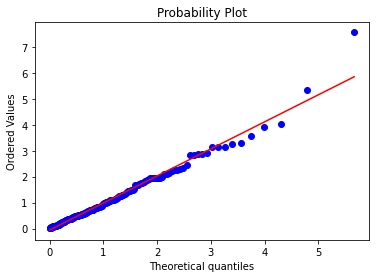

In [10]:
# Plot the Q-Q plot to graphically check for the hypothesis

## Notice the dist parameter in the probplot method
res = stats.probplot(random_exponential_data, plot=plt, dist=stats.expon)
plt.show()

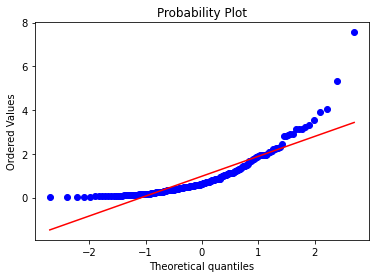

In [11]:
# Plot the Q-Q plot to graphically check for the hypothesis

## Notice the dist parameter in the probplot method
res = stats.probplot(random_exponential_data, plot=plt)
plt.show()

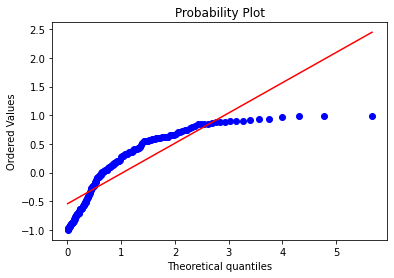

In [12]:
# If it try to plot the uniform data on this distance, the results will deviate a lot
res = stats.probplot(random_uniform_datapoints, plot=plt, dist=stats.expon)
plt.show()

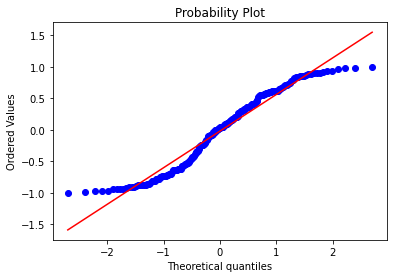

In [13]:
# If it try to plot the uniform data on this distance, the results will deviate a lot
res = stats.probplot(random_uniform_datapoints, plot=plt)
plt.show()